Ce document est **interactif**.

Il s'agit d'un **notebook Octave hebergé en ligne** et qui est **modifiable**.

Vous pouvez executer chaque cellule avec le bouton **Executer** ou plus simple avec le raccourci **Maj+↲**

Certaines cellules contiennent du code, d'autres, du texte.
Vous pouvez donc modifier toutes les cellules pour vos tests sans risquer quoique ce soit pour vous ou pour les autres utilisateurs. Vous pourrez toujours recharger le lien pour repartir à zéro.

In [1]:
pkg load signal

#### Fonction de création d'une réponse impulsionnelle tronquée d'un filtre passe-bas idéal.

In [2]:
function hd = ideal_lp(wc,M);
% Ideal LowPass filter computation
% --------------------------------
% [hd] = ideal_lp(wc,M)
% hd = ideal impulse response between 0 to M-1
% wc = cutoff frequency in radians
% M = length of the ideal filter
%
alpha = (M-1)/2; n = [0:1:(M-1)];
m = n - alpha; fc = wc/pi; hd = fc*sinc(fc*m);
endfunction

#### Fonction de calcul de la réponse en fréquence (avec freqz) pour un filtre de coefficients a, b

In [3]:
function [db,mag,pha,grd,w] = freqz_m(b,a);
% Modified version of freqz subroutine
% ------------------------------------
% [db,mag,pha,grd,w] = freqz_m(b,a);
% db = Relative magnitude in dB computed over 0 to pi radians
% mag = absolute magnitude computed over 0 to pi radians
% pha = Phase response in radians over 0 to pi radians
% grd = Group delay over 0 to pi radians
% w = 501 frequency samples between 0 to pi radians
% b = numerator polynomial of H(z) (for FIR: b=h)
% a = denominator polynomial of H(z) (for FIR: a=[1])
%
[H,w] = freqz(b,a,1000,"whole");
H = (H(1:1:501))'; w = (w(1:1:501))';
mag = abs(H); db = 20*log10((mag+eps)/max(mag));
pha = angle(H); grd = grpdelay(b,a,w);
endfunction

--------

### Exercice: Implémentation d'un filtre passe-bas avec Octave

1. Implémentez un filter FIR passe-bas numérique avec les spécifications suivantes:
 - Pulsation passante $\omega_p=0.2\pi$, $\delta_1=\delta_2=20 \log_{10}(1+\delta_1)=0.25$ dB
 - Pulsation coupante $\omega_s=0.3\pi$, $A=50$ dB
 

2. Choisir la fenêtre de pondération appropriée à partir du tableau ci-dessous. 
3. Déterminer la réponse impulsionnelle et faire un plot de la réponse en fréquence du filtre.

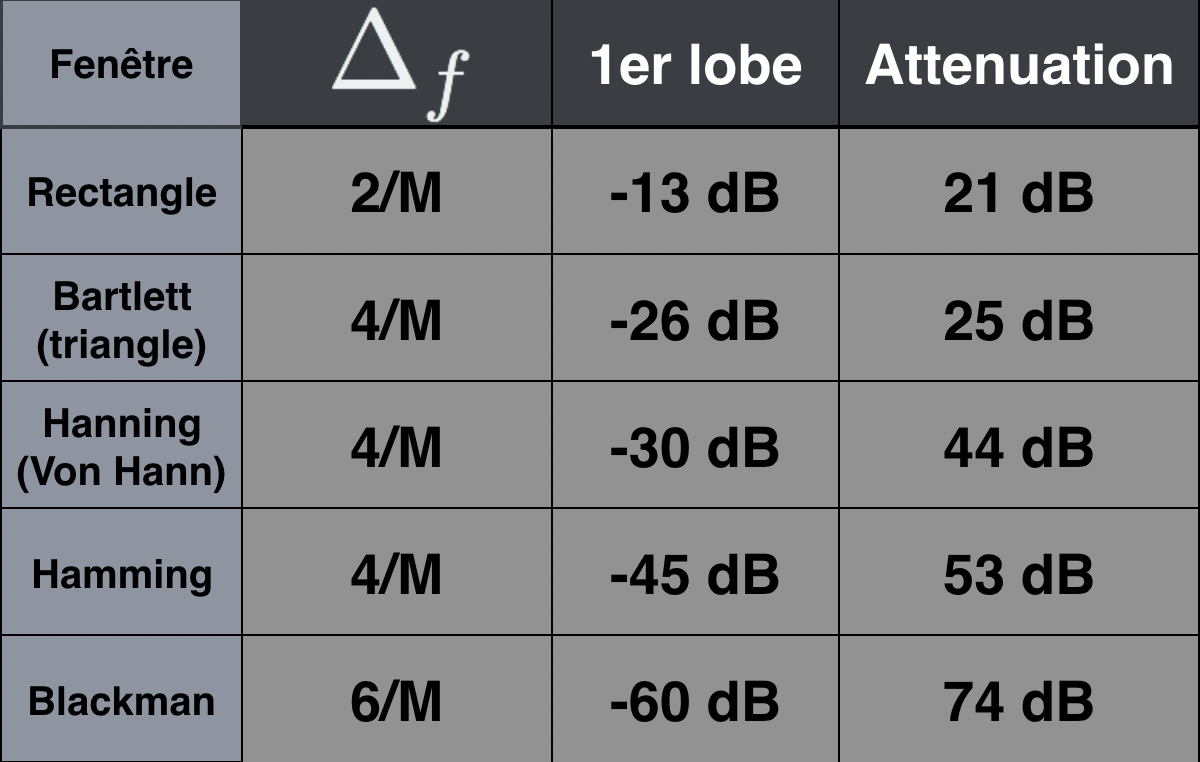

-----

**Atténuation**: 

Les fenêtres de Hamming (53 dB) et Blackman (74 dB) conviennent pour avoir une atténuation au moins égale à 50 dB.

**Bande de transition**: 

Entre les deux fenêtres, on va prendre la fenêtre de Hamming qui apportera la plus petite largeur de bande de transition (4/M pour Hamming et 6/M pour Blackman). 


#### Calcul des pulsations normalisées

In [4]:
wp=0.2*pi;
ws=0.3*pi;
deltaf=ws-wp;

#### Calcul de la largeur de la fenêtre

In [5]:
% Deltaf=4/M ou 8pi/M donc M = 8pi/deltaf
M=ceil(2*pi*4/deltaf)
disp(['La fenêtre doit être de taille ' num2str(M)])

M =  80
La fenêtre doit être de taille 80


In [6]:
n=[0:1:M-1];
wc=(wp+ws)/2; # fréquence de coupure du filtre idéal = moyenne de wp et ws

#### Calcul de la réponse impulsionelle idéale tronquée

In [7]:
hid=ideal_lp(wc,M);
[db_tronc,mag_tronc,pha_tronc,grd_tronc,w_tronc] = freqz_m(hid,[1]);

    grpdelay at line 191 column 5
    freqz_m at line 16 column 21


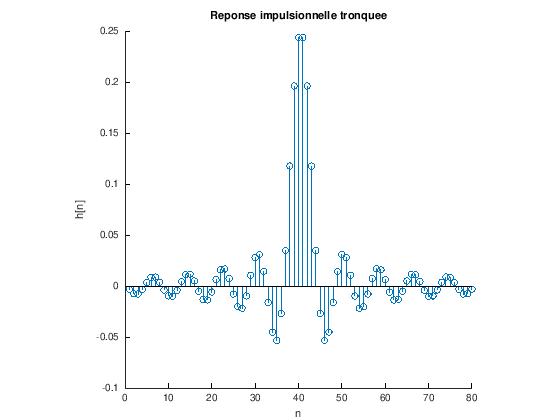

In [8]:
stem(hid)
axis("square")
title("Reponse impulsionnelle tronquee")
xlabel('n')
ylabel('h[n]')

#### Calcul de la réponse en fréquences associée

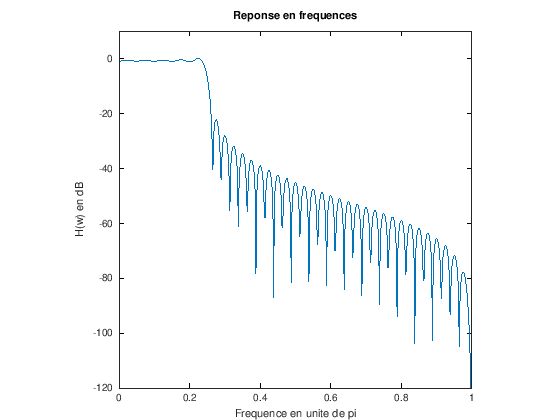

In [9]:
plot(w_tronc/pi,db_tronc)
ylim([-120 10])
axis("square")
title("Reponse en frequences")
xlabel('Frequence en unite de pi')
ylabel('H(w) en dB')

#### Création d'une fenêtre de pondération: Hamming

In [10]:
w_ham=hamming(M);

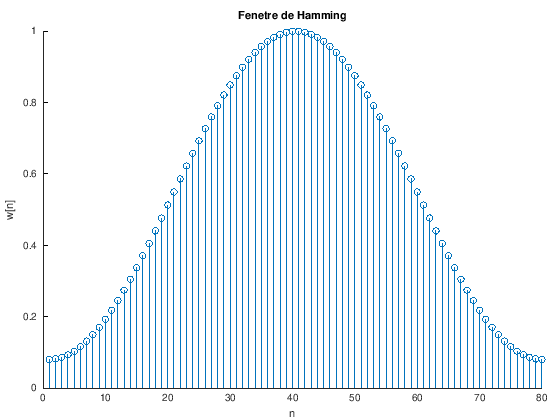

In [11]:
stem(w_ham)
title("Fenetre de Hamming")
xlabel('n')
ylabel('w[n]')

#### Multiplication de la réponse impulsionnelle tronquée avec la fenêtre de pondération

In [12]:
hreal=hid.*w_ham';

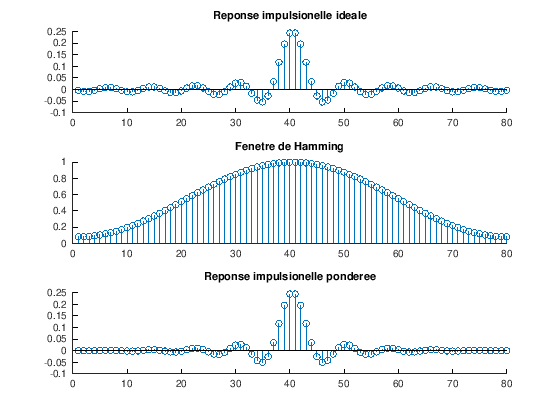

In [13]:
subplot(311)
stem(hid)
title('Reponse impulsionelle ideale')
subplot(312)
stem(w_ham)
title('Fenetre de Hamming')
subplot(313)
stem(hreal)
title('Reponse impulsionelle ponderee')

In [14]:
[db,mag,pha,grd,w] = freqz_m(hreal,[1]);

delta_w = 2*pi/1000; # echantillonnage des fréquences pour le plot seulement

    grpdelay at line 191 column 5
    freqz_m at line 16 column 21


#### Calcul du delta effectif
Calcul de l'oscillation max: $\delta_1$ en dB dans la bande passante.

In [15]:
delta1=-(min(db(1:1:wp/delta_w+1)));
disp(["Delta_1 vaut " num2str(delta1) " dB"])

Delta_1 vaut 0.03164 dB


Bien inférieur au cahier des charges qui voulait max 0.25 dB

#### Calcul de l'atténuation effective
Calcul du niveau du 1er lobe secondaire dans la bande coupante.

In [16]:
Att=-round(max(db(ws/delta_w+1:1:end)));
disp(["L'atténuation vaut " num2str(Att) " dB"])

L'atténuation vaut 53 dB


#### Comparaison des réponses en fréquence avec/sans pondération

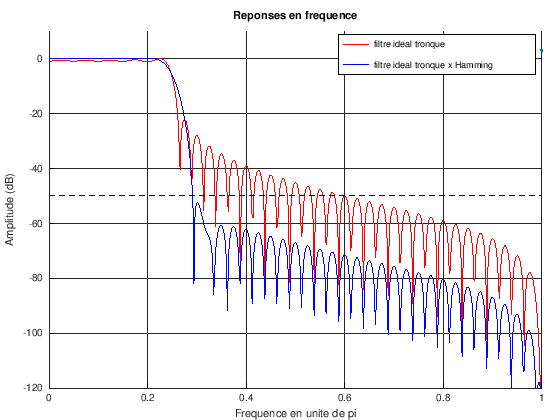

In [17]:
hold on
plot(w/pi,db_tronc,'r')
plot(w/pi,db,'b',lw=3)
plot([0 1],[-50 -50],'k--')
legend('filtre ideal tronque',"filtre ideal tronque x Hamming")
ylim([-120 10])
title('Reponses en frequence')
ylabel('Amplitude (dB)')
xlabel('Frequence en unite de pi')
grid
hold off